In [41]:
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
from wrangle import wrangle_zillow, scale_data
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from explore import plot_variable_pairs, plot_categorical_and_continuous_vars

## As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

## Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [2]:
train, validate, test = wrangle_zillow()

In [3]:
train.head()

,bedroom_count,bathroom_count,calc_sqr_feet,tax_value,yearbuilt,taxamount,county_code,is_county_code_6037.0,is_county_code_6059.0,is_county_code_6111.0
947232,5.0,3.5,3432.0,893004.0,2001.0,13320.60,6059.0,0,1,0
1559262,3.0,3.0,1671.0,260933.0,1947.0,3187.08,6059.0,0,1,0
770438,3.0,2.0,1672.0,167176.0,1959.0,2093.45,6037.0,1,0,0
245576,4.0,2.0,2054.0,738566.0,2002.0,8507.10,6059.0,0,1,0
1695674,3.0,2.0,2132.0,114067.0,1958.0,3159.90,6037.0,1,0,0


In [ ]:
train.shape

In [4]:
df = train

In [5]:
df

,bedroom_count,bathroom_count,calc_sqr_feet,tax_value,yearbuilt,taxamount,county_code,is_county_code_6037.0,is_county_code_6059.0,is_county_code_6111.0
947232,5.0,3.5,3432.0,893004.0,2001.0,13320.60,6059.0,0,1,0
1559262,3.0,3.0,1671.0,260933.0,1947.0,3187.08,6059.0,0,1,0
770438,3.0,2.0,1672.0,167176.0,1959.0,2093.45,6037.0,1,0,0
245576,4.0,2.0,2054.0,738566.0,2002.0,8507.10,6059.0,0,1,0
1695674,3.0,2.0,2132.0,114067.0,1958.0,3159.90,6037.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1035662,5.0,3.0,2308.0,656000.0,1959.0,8042.45,6037.0,1,0,0
463244,3.0,2.0,1700.0,209048.0,1956.0,2411.70,6111.0,0,0,1
1766269,4.0,2.5,2282.0,527044.0,1979.0,6149.84,6111.0,0,0,1
324934,3.0,2.0,1711.0,485663.0,1962.0,6029.84,6037.0,1,0,0


In [6]:
df = df.drop(columns=['is_county_code_6037.0','is_county_code_6059.0','is_county_code_6111.0'])

In [7]:
df

,bedroom_count,bathroom_count,calc_sqr_feet,tax_value,yearbuilt,taxamount,county_code
947232,5.0,3.5,3432.0,893004.0,2001.0,13320.60,6059.0
1559262,3.0,3.0,1671.0,260933.0,1947.0,3187.08,6059.0
770438,3.0,2.0,1672.0,167176.0,1959.0,2093.45,6037.0
245576,4.0,2.0,2054.0,738566.0,2002.0,8507.10,6059.0
1695674,3.0,2.0,2132.0,114067.0,1958.0,3159.90,6037.0
...,...,...,...,...,...,...,...
1035662,5.0,3.0,2308.0,656000.0,1959.0,8042.45,6037.0
463244,3.0,2.0,1700.0,209048.0,1956.0,2411.70,6111.0
1766269,4.0,2.5,2282.0,527044.0,1979.0,6149.84,6111.0
324934,3.0,2.0,1711.0,485663.0,1962.0,6029.84,6037.0


## Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [23]:
def plot_variable_pairs(df, sample_size=100000, variables=None):
    if variables is None:
        variables = df.columns

    sns.set(style="ticks")
    
    if sample_size < len(df):
        df_sample = df.sample(n=sample_size, random_state=123)
    else:
        df_sample = df

    
    sns.pairplot(df_sample[variables], kind="reg", plot_kws={'line_kws': {'color': 'red'}})
    plt.show()
    
   


In [ ]:
plot_variable_pairs(df)

## Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [10]:
categorical_col = 'county_code'
continuous_cols = ['bedroom_count','bathroom_count','calc_sqr_feet', 'tax_value' , 'yearbuilt', 'taxamount']


In [38]:
def plot_categorical_and_continuous_vars(df):
    for continuous_col in tqdm(continuous_cols):
        plt.figure(figsize=(10, 4))
        
        
        plt.subplot(131)
        sns.boxplot(data = df.sample(frac = 0.10), x=categorical_col, y=continuous_col)
        plt.title('Box Plot')
        
        plt.subplot(132)
        sns.violinplot(data = df.sample(frac = 0.10),x=categorical_col, y=continuous_col)
        plt.title('Violin Plot')
        
        plt.subplot(133)
        sns.scatterplot(data = df.sample(frac = 0.10), x=categorical_col, y=continuous_col)
        plt.title('Scatter Plot')

    

        

    
    

## Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

## Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

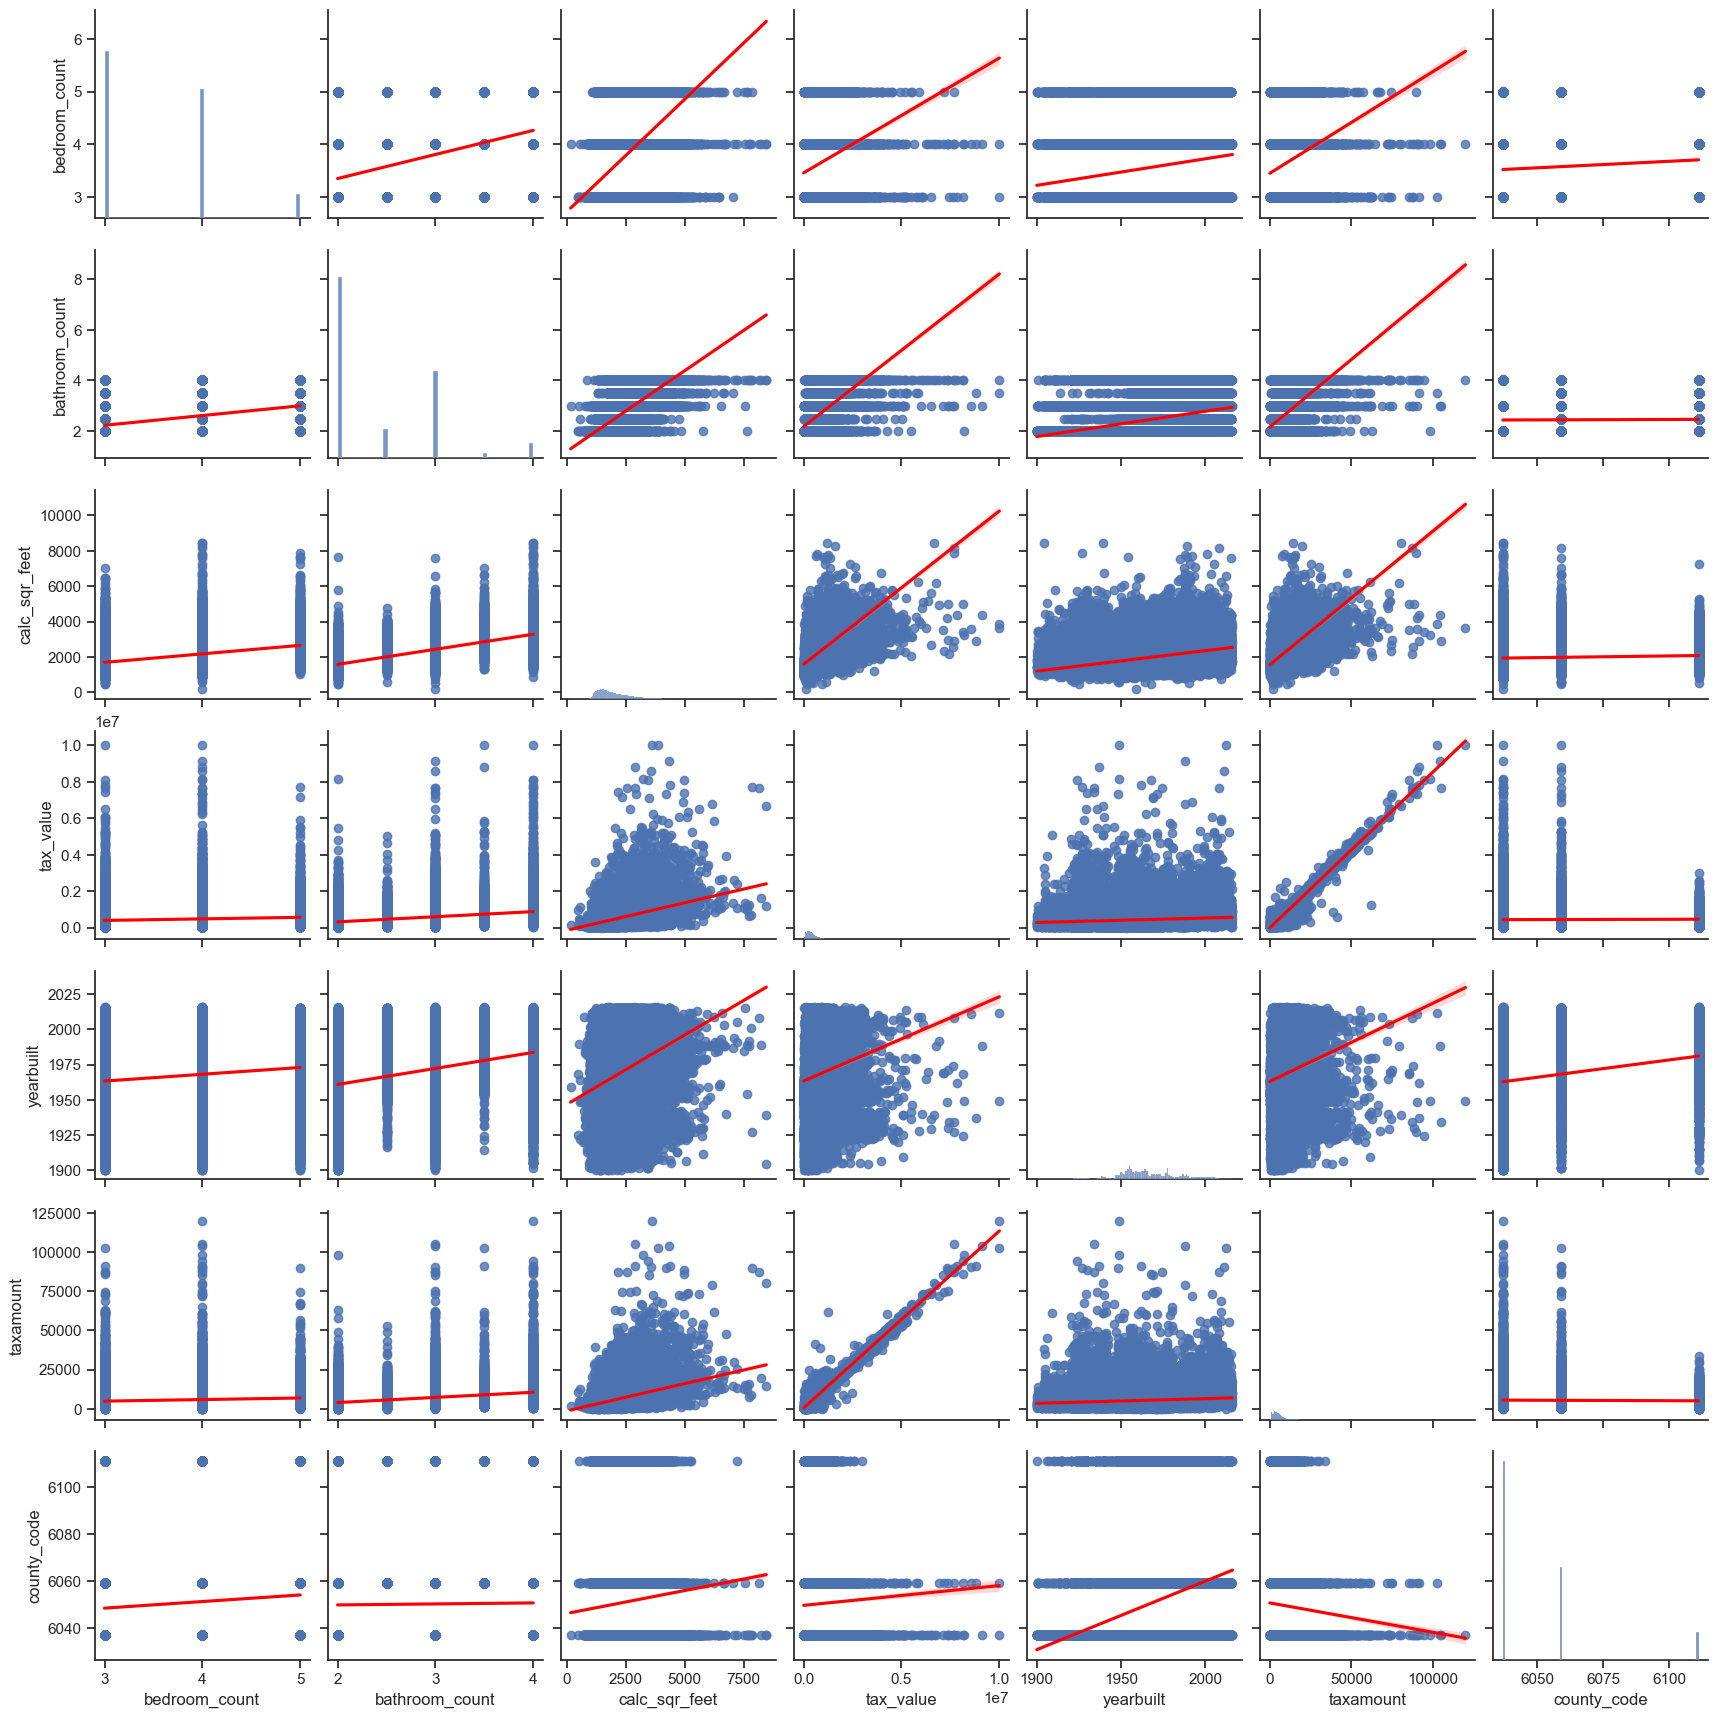

In [44]:
plot_variable_pairs(df)

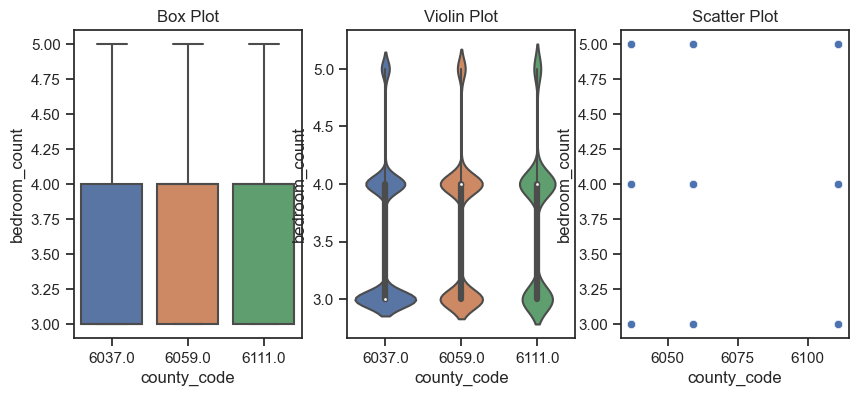

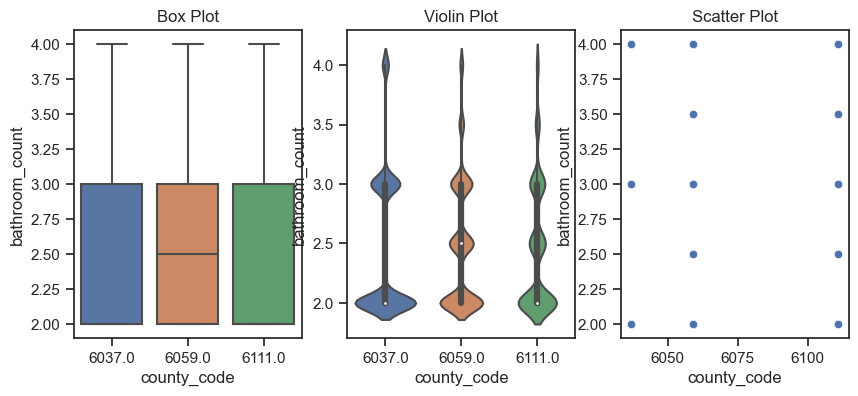

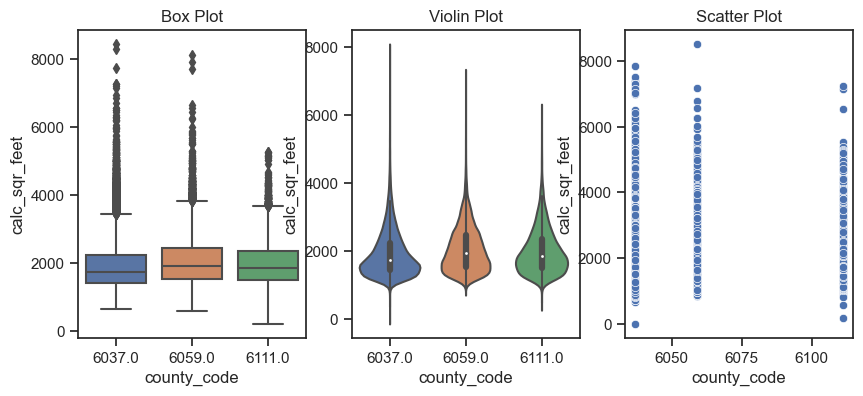

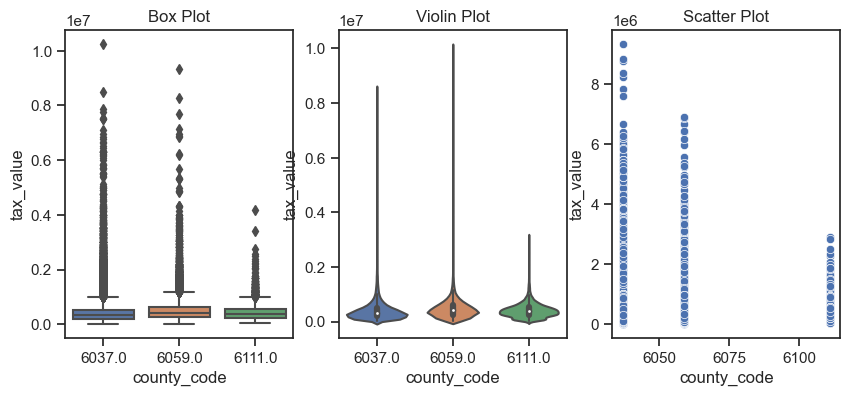

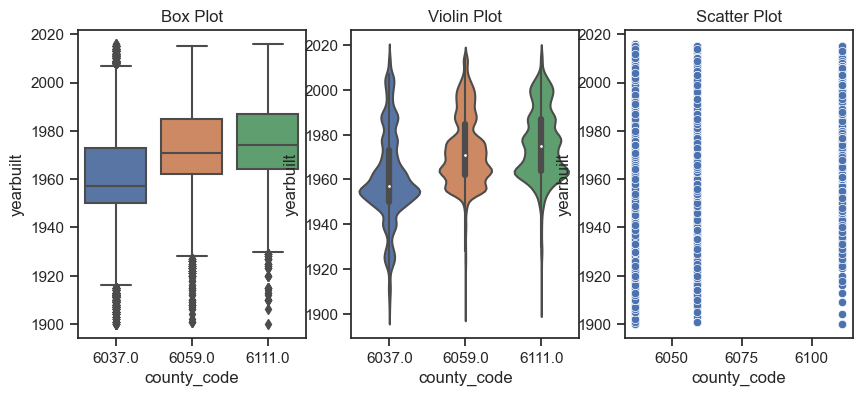

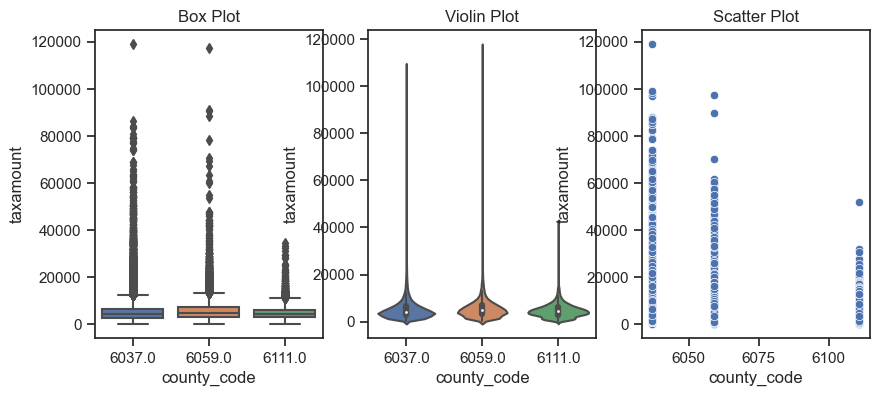

In [42]:
plot_categorical_and_continuous_vars(df)

## Come up with some initial hypotheses based on your goal of predicting property value.

#### hyp 1

ho: there is no relation between tax_value and taxamaount

ha: there is a relationship between tax_value and taxamount

#### hyp 2

ho: there is no relation between tax_value and calc_sqr_feet

ha: there is a relationship between tax_value and calc_sqr_feet

## Visualize all combinations of variables in some way.

this is done via function from printed visual above

##### using plot_variable_pairs(df)

## Run the appropriate statistical tests where needed.

## What independent variables are correlated with the dependent variable, home value?

In [67]:
import pandas as pd
from scipy.stats import pearsonr

independent_vars = ['bedroom_count', 'bathroom_count', 'yearbuilt', 'calc_sqr_feet', 'taxamount']

dependent_var = 'tax_value'

correlation_matrix = pd.DataFrame(index=independent_vars, columns=['Pearson correlation'])

for var in independent_vars:
    corr, _ = pearsonr(df[var], df[dependent_var])
    correlation_matrix.loc[var, 'Pearson correlation'] = corr

print(correlation_matrix)


               Pearson correlation
bedroom_count             0.131348
bathroom_count            0.406462
yearbuilt                 0.124326
calc_sqr_feet             0.505172
taxamount                 0.982941


#### There is a positive correlation between the tax_value (dependent variable) and the following independent variables:
#### bathroom_count: The correlation coefficient is 0.406, indicating a moderate positive relationship. As the number of bathrooms increases, the tax value tends to increase as well.
#### calc_sqr_feet: The correlation coefficient is 0.505, indicating a moderate positive relationship. As the calculated square footage increases, the tax value tends to increase.
#### taxamount: The correlation coefficient is 0.983, indicating a strong positive relationship. As the tax amount increases, the tax value also increases. This correlation is expected since the tax value and tax amount are likely related.
#### The correlation coefficients for bedroom_count and yearbuilt are relatively smaller (0.131 and 0.124, respectively), suggesting weaker positive relationships with the tax_value. However, these correlations are still present, indicating that as the number of bedrooms or the year built increases, the tax value tends to increase, although to a lesser extent compared to the other variables.

## Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

In [64]:
independent_vars = ['bedroom_count', 'bathroom_count', 'yearbuilt', 'calc_sqr_feet']
correlation_matrix = pd.DataFrame(index=independent_vars, columns=independent_vars)

for var1 in independent_vars:
    for var2 in independent_vars:
        if var1 != var2:
            corr, _ = pearsonr(df[var1], df[var2])
            correlation_matrix.loc[var1, var2] = corr


print(correlation_matrix)


               bedroom_count bathroom_count yearbuilt calc_sqr_feet
bedroom_count            NaN       0.417792  0.161084      0.452003
bathroom_count      0.417792            NaN  0.339982      0.736606
yearbuilt           0.161084       0.339982       NaN      0.342597
calc_sqr_feet       0.452003       0.736606  0.342597           NaN


#### There is a positive correlation between the number of bedrooms and the number of bathrooms, with a correlation coefficient of 0.418. This suggests that as the number of bedrooms increases, the number of bathrooms tends to increase as well.
#### The number of bedrooms also shows a positive correlation with the calculated square footage (calc_sqr_feet), with a correlation coefficient of 0.452. This indicates that as the number of bedrooms increases, the calculated square footage tends to increase as well.
#### The number of bathrooms exhibits a positive correlation with both the calculated square footage and the year built. The correlation coefficient between the number of bathrooms and the calculated square footage is 0.737, indicating a strong positive relationship. The correlation coefficient between the number of bathrooms and the year built is 0.340, indicating a moderate positive relationship.
#### There is a relatively weaker positive correlation between the year built and the number of bedrooms (correlation coefficient of 0.161) and the calculated square footage (correlation coefficient of 0.343).
#### 


## Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

#### I would like to further explore square footage and bathroom count as they seem to have a very strong correlation. I would also like to call out that square footage is very correlated to tax value as well
 
#### This was concluded from the visuals and statistical testing using pearsons R.

## Explore your dataset with any other visualizations you think will be helpful.

Text(0.5, 1.0, 'Scatter Plot')

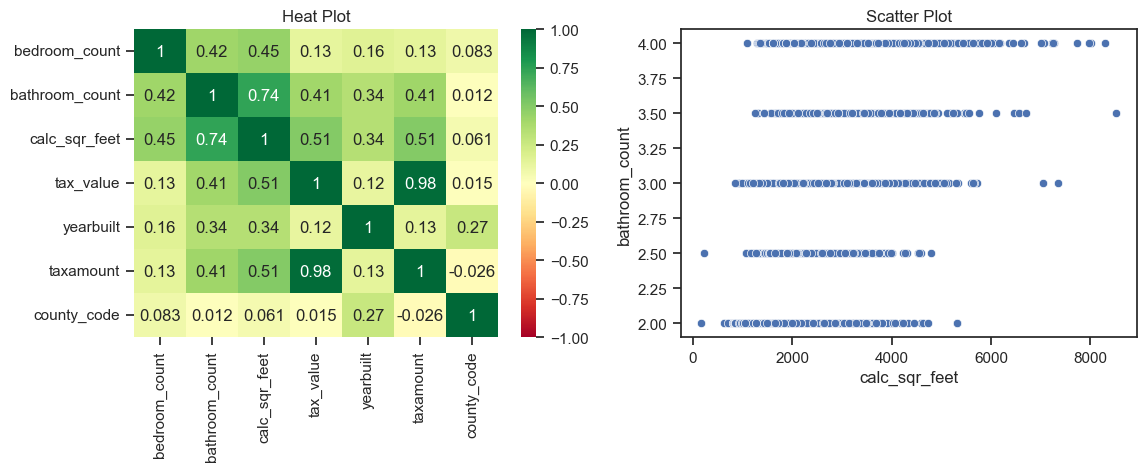

In [85]:
plt.figure(figsize=(20, 4))


plt.subplot(132)
sns.heatmap(df.corr(), cmap = 'RdYlGn', vmin = -1, vmax = 1, annot = True)
plt.title('Heat Plot')

plt.subplot(133)
sns.scatterplot(data = df.sample(frac = 0.10),x='calc_sqr_feet', y= 'bathroom_count')
plt.title('Scatter Plot')

In [98]:
df.corr()['tax_value'].to_frame()

,tax_value
bedroom_count,0.131348
bathroom_count,0.406462
calc_sqr_feet,0.505172
tax_value,1.000000
yearbuilt,0.124326
taxamount,0.982941
county_code,0.015260


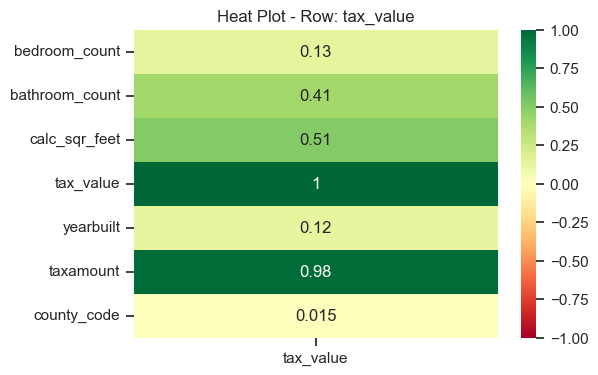

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 4))

# Calculate the correlation matrix
corr_matrix = df.corr()

# Select the row to display
row_to_display = 'tax_value'  # Replace with the desired row label

# Extract the specific row from the correlation matrix
row_data = corr_matrix

# Create a DataFrame with the row data


plt.subplot(132)
sns.heatmap(df.corr()['tax_value'].to_frame(), cmap='RdYlGn', vmin=-1, vmax=1, annot=True)
plt.title('Heat Plot - Row: ' + row_to_display)

plt.show()


Text(0.5, 1.0, 'Scatter Plot')

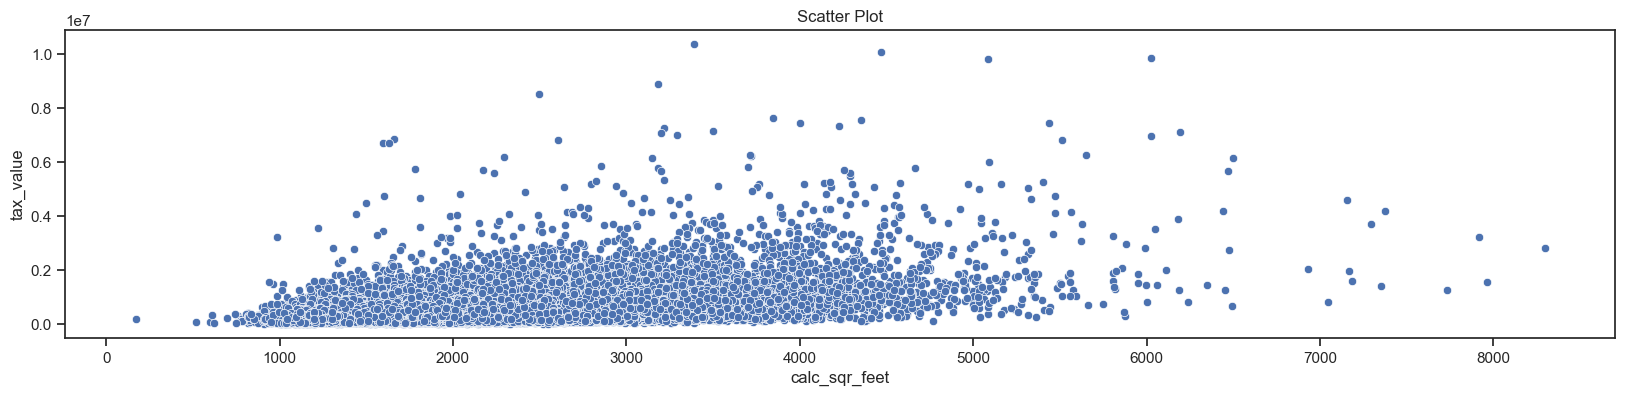

In [90]:
plt.figure(figsize=(20, 4))



sns.scatterplot(data = df.sample(frac = 0.10),x='calc_sqr_feet', y= 'tax_value')
plt.title('Scatter Plot')